``` Author: Anisha Pandey``` <br/>
``` Email: anishap1309@gmail.com``` <br/>
``` Linkedin: https://www.linkedin.com/in/anishapandey```

### Importing python libraries

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

### Define file path variables

In [16]:
directory_name = "E:/MBA Project/dataset/"  # file path variable
file_name = "Parking_Transactions.csv" # file name variable
file_path = directory_name + file_name  # concatenating file path and file name to generate full file path
print(file_path) # print

E:/MBA Project/dataset/Parking_Transactions.csv


### Data Ingestion

In [17]:
df = pd.read_csv(file_path)  # reading csv file for the given path into a dataframe variable called df
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### Exploratory Data Analysis

In [18]:
# Data Overview
print("Shape:", df.shape)
print("Data Types:\n", df.dtypes)

Shape: (658686, 10)
Data Types:
 ID                  int64
Source             object
Start Time         object
End Time           object
Amount            float64
Kiosk ID          float64
App Zone ID       float64
Payment Method     object
Location Group     object
Last Updated       object
dtype: object


In [19]:
# print Sample Data
df.head()

,ID,Source,Start Time,End Time,Amount,Kiosk ID,App Zone ID,Payment Method,Location Group,Last Updated
0,91886070,Parking Meters,3/16/2023 20:19,3/16/2023 23:58,NaN,10001040.0,NaN,CARD,Level 2,4/30/2023 9:26
1,91886073,Parking Meters,3/16/2023 20:19,3/16/2023 22:34,NaN,10000632.0,NaN,CARD,Level 2,4/30/2023 9:26
2,91886074,Parking Meters,3/16/2023 20:20,3/16/2023 23:58,NaN,24002477.0,NaN,CARD,Level 1,4/30/2023 9:26
3,91886075,Parking Meters,3/16/2023 20:19,3/16/2023 22:34,NaN,10000402.0,NaN,CARD,Level 2,4/30/2023 9:26
4,491450182,Passport - app,9/9/2023 18:41,9/9/2023 20:11,NaN,NaN,39744.0,App - Wallet,Level 1,10/31/2023 9:19


In [20]:
# Summary Statistics
print("\nSummary Statistics for numeric columns:")
(df.describe())


Summary Statistics for numeric columns:


,ID,Amount,Kiosk ID,App Zone ID
count,6.586860e+05,658454.000000,2.318750e+05,426811.000000
mean,3.386006e+08,4.900178,2.359751e+07,39405.287087
std,1.840932e+08,4.770313,1.983773e+07,1132.339034
min,7.895860e+07,0.000000,1.000010e+07,101.000000
25%,9.201985e+07,2.250000,1.000066e+07,39191.000000
50%,4.386015e+08,3.300000,2.000098e+07,39306.000000
75%,4.845260e+08,5.500000,2.600260e+07,39630.000000
max,6.089531e+08,47.820000,9.100190e+07,400001.000000


In [21]:
print("\nSummary Statistics for categorical columns:")
df.describe(include=['object'])


Summary Statistics for categorical columns:


,Source,Start Time,End Time,Payment Method,Location Group,Last Updated
count,658686,658686,658686,658631,658419,658686
unique,3,141487,137431,8,7,145
top,Passport - app,9/16/2023 11:00,7/16/2023 0:00,App - Wallet,Level 2,9/30/2023 9:15
freq,424909,233,674,415026,331429,65651


In [22]:
# Print schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658686 entries, 0 to 658685
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              658686 non-null  int64  
 1   Source          658686 non-null  object 
 2   Start Time      658686 non-null  object 
 3   End Time        658686 non-null  object 
 4   Amount          658454 non-null  float64
 5   Kiosk ID        231875 non-null  float64
 6   App Zone ID     426811 non-null  float64
 7   Payment Method  658631 non-null  object 
 8   Location Group  658419 non-null  object 
 9   Last Updated    658686 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 50.3+ MB


In [23]:
# Data Quality Checks
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDuplicate rows count:", df.duplicated().sum())


Missing values per column:
ID                     0
Source                 0
Start Time             0
End Time               0
Amount               232
Kiosk ID          426811
App Zone ID       231875
Payment Method        55
Location Group       267
Last Updated           0
dtype: int64

Duplicate rows count: 239


count    658454.000000
mean          4.900178
std           4.770313
min           0.000000
25%           2.250000
50%           3.300000
75%           5.500000
max          47.820000
Name: Amount, dtype: float64


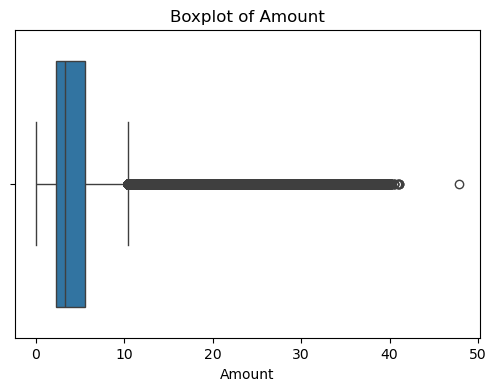

In [24]:
# Univariate Analysis - Learn more about boxplot https://builtin.com/data-science/boxplot

print(df['Amount'].describe())
# Boxplot of amount
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Amount')
plt.show()

In [25]:
# Outlier detection example for Amount using IQR - learn more about IQR https://www.statisticshowto.com/probability-and-statistics/interquartile-range/
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR:{IQR}')
outliers_amount = df[(df['Amount'] < (Q1 - 1.5*IQR)) | (df['Amount'] > (Q3 + 1.5*IQR))]
print(f'Shape: {outliers_amount.shape}')
outliers_amount.head()

IQR:3.25
Shape: (56063, 10)


,ID,Source,Start Time,End Time,Amount,Kiosk ID,App Zone ID,Payment Method,Location Group,Last Updated
32,91886109,Parking Meters,3/16/2023 20:26,3/16/2023 23:58,16.29,24002415.0,NaN,CARD,Level 1,4/30/2023 9:26
398,91886971,Parking Meters,3/17/2023 6:06,3/17/2023 12:00,10.75,35001548.0,NaN,CARD,Underground 1,4/30/2023 9:26
399,91886973,Parking Meters,3/17/2023 6:06,3/17/2023 12:00,10.75,10000122.0,NaN,CARD,Level 2,4/30/2023 9:26
400,91886982,Parking Meters,3/17/2023 6:09,3/17/2023 12:00,10.75,10000604.0,NaN,CARD,Level 2,4/30/2023 9:26
403,91887009,Parking Meters,3/17/2023 6:31,3/17/2023 12:00,10.75,10000744.0,NaN,CARD,Level 2,4/30/2023 9:26


count    658454.000000
mean          4.900178
std           4.770313
min           0.000000
25%           2.250000
50%           3.300000
75%           5.500000
max          47.820000
Name: Amount, dtype: float64


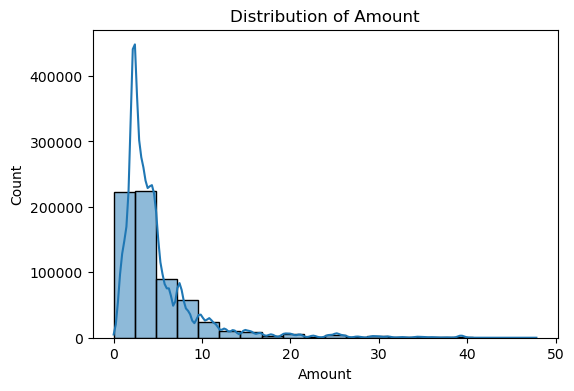

'\nAs we can see 75% of customers pay 5.5 or less. 4.9 is the average amount any customer pays. \nWe can confirm that with the distribution below. Two tallest bar are between 0 to 4.\n'

In [26]:
# 4. Distribution of Amount
print(df['Amount'].describe())
plt.figure(figsize=(6,4))
sns.histplot(df['Amount'].dropna(), bins=20, kde=True)
plt.title('Distribution of Amount')
plt.show()

'''
As we can see 75% of customers pay 5.5 or less. 4.9 is the average amount any customer pays. 
We can confirm that with the distribution below. Two tallest bar are between 0 to 4.
'''

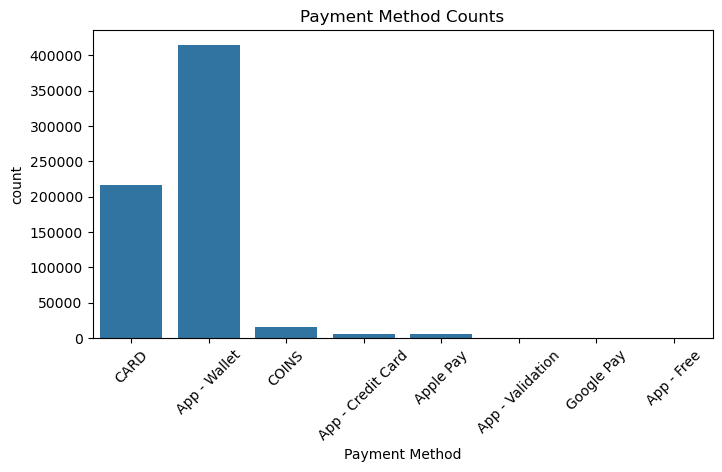

'\nfollowing visualization shows mostly customers chooses mobile application to pay parking fee which makes sense.\nAs mobile app is one of the most convenient and safe ways to pay.\n'

In [27]:
# 5. Countplot of Payment Method
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Payment Method')
plt.title('Payment Method Counts')
plt.xticks(rotation=45)
plt.show()

'''
following visualization shows mostly customers chooses mobile application to pay parking fee which makes sense.
As mobile app is one of the most convenient and safe ways to pay.
'''

In [28]:
# In the next step we are defining category to understand customer behaviour. We need to understand which channel is mostly used by any customer.
# Following is a mapping which defines a column called payment_type which can be CREDIT/DEBIT, MOBILE APP, DIGITAL WALLET, CASH
mapping = {
    'App - Credit Card': 'CREDIT/DEBIT',
    'App - Free': 'MOBILE APP',
    'App - Validation': 'MOBILE APP',
    'App - Wallet': 'MOBILE APP',
    'Apple Pay': 'DIGITAL WALLET',
    'CARD': 'CREDIT/DEBIT',
    'COINS': 'CASH',
    'Google Pay': 'DIGITAL WALLET'
}

df['payment_type'] = df['Payment Method'].map(mapping).fillna(df['Payment Method'])
print(df['Payment Method'].isnull().sum())
df.head()

55


,ID,Source,Start Time,End Time,Amount,Kiosk ID,App Zone ID,Payment Method,Location Group,Last Updated,payment_type
0,91886070,Parking Meters,3/16/2023 20:19,3/16/2023 23:58,NaN,10001040.0,NaN,CARD,Level 2,4/30/2023 9:26,CREDIT/DEBIT
1,91886073,Parking Meters,3/16/2023 20:19,3/16/2023 22:34,NaN,10000632.0,NaN,CARD,Level 2,4/30/2023 9:26,CREDIT/DEBIT
2,91886074,Parking Meters,3/16/2023 20:20,3/16/2023 23:58,NaN,24002477.0,NaN,CARD,Level 1,4/30/2023 9:26,CREDIT/DEBIT
3,91886075,Parking Meters,3/16/2023 20:19,3/16/2023 22:34,NaN,10000402.0,NaN,CARD,Level 2,4/30/2023 9:26,CREDIT/DEBIT
4,491450182,Passport - app,9/9/2023 18:41,9/9/2023 20:11,NaN,NaN,39744.0,App - Wallet,Level 1,10/31/2023 9:19,MOBILE APP


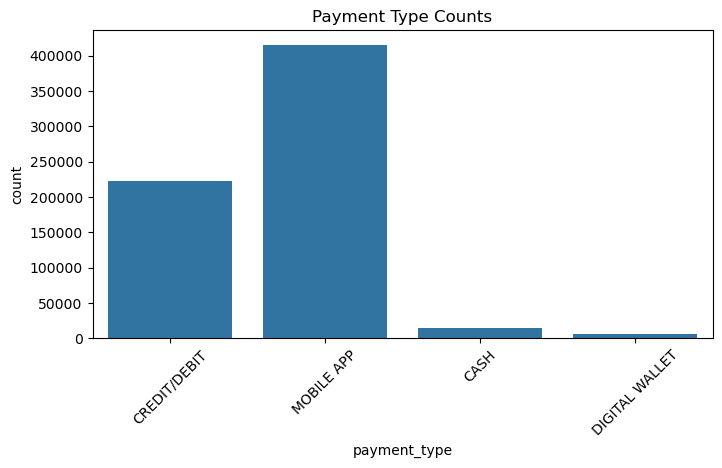

'\nWe can clearly see mobile app dominates any other payment methods. People are not preferring cash, it is difficult to carry cash and use machine. \n'

In [29]:
# 6. Countplot of Payment type
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='payment_type')
plt.title('Payment Type Counts')
plt.xticks(rotation=45)
plt.show()

'''
We can clearly see mobile app dominates any other payment methods. People are not preferring cash, it is difficult to carry cash and use machine. 
'''

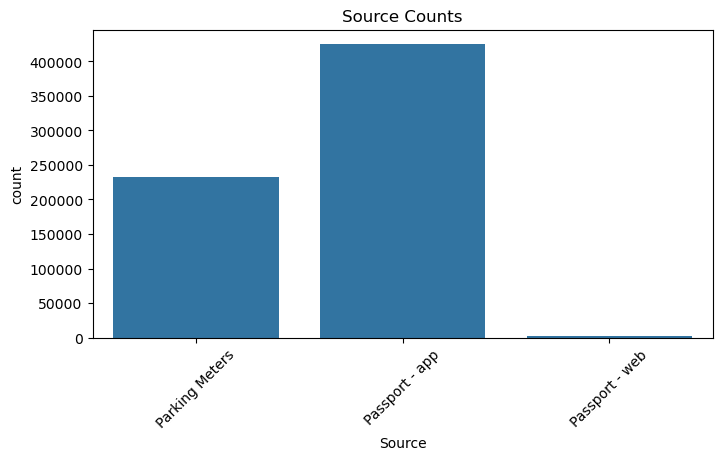

In [30]:
# 6. Countplot of Source
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Source')
plt.title('Source Counts')
plt.xticks(rotation=45)
plt.show()

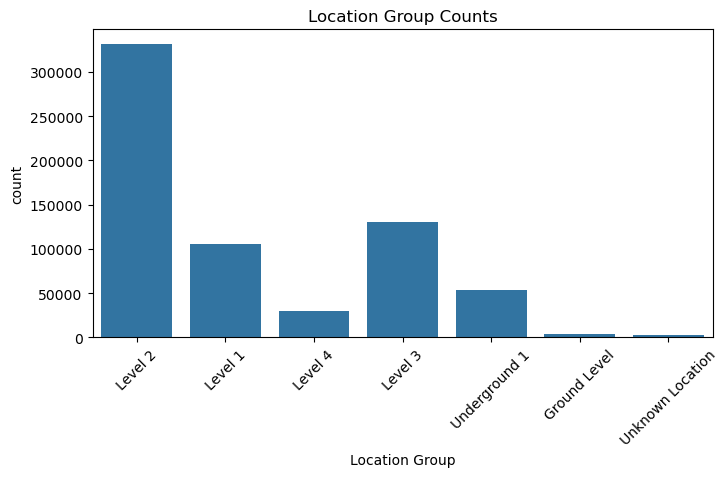

'\nLevel 2 is the favorite place and Ground level is one of the least favorite place which is a great observation. \nAs a data professional we need further analysis to undertsand why it is happening. \n'

In [31]:
# 7. Countplot of Location Group
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Location Group')
plt.title('Location Group Counts')
plt.xticks(rotation=45)
plt.show()

'''
Level 2 is the favorite place and Ground level is one of the least favorite place which is a great observation. 
As a data professional we need further analysis to undertsand why it is happening. 
'''


Duration statistics:
count    658686.000000
mean        125.462278
std         107.664266
min           0.000000
25%          60.000000
50%          90.000000
75%         150.000000
max        2389.000000
Name: Duration_minutes, dtype: float64


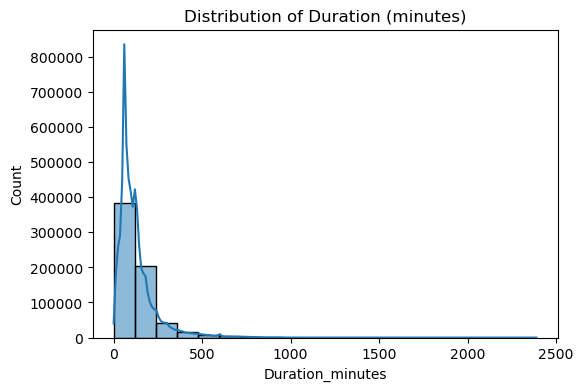

In [32]:
# Calculate Duration (if End Time & Start Time exist)
# Convert datetime columns to pandas datetime
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')
df['End Time'] = pd.to_datetime(df['End Time'], errors='coerce')
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

df['Duration_minutes'] = (df['End Time'] - df['Start Time']).dt.total_seconds() / 60
print("\nDuration statistics:")
print(df['Duration_minutes'].describe())

plt.figure(figsize=(6,4))
sns.histplot(df['Duration_minutes'].dropna(), bins=20, kde=True)
plt.title('Distribution of Duration (minutes)')
plt.show()

count    658686.000000
mean        125.462278
std         107.664266
min           0.000000
25%          60.000000
50%          90.000000
75%         150.000000
max        2389.000000
Name: Duration_minutes, dtype: float64


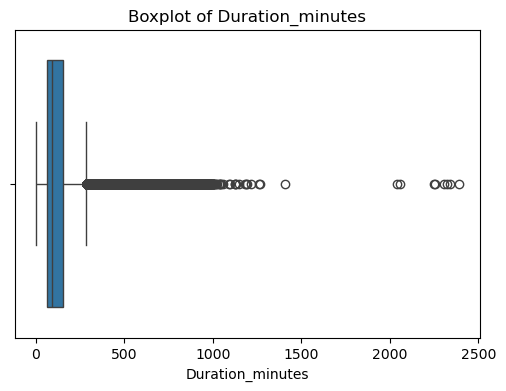

In [33]:

print(df['Duration_minutes'].describe())
# Boxplot of Duration_minutes
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Duration_minutes'])
plt.title('Boxplot of Duration_minutes')
plt.show()

# We can see their are many outliers. 75% of the people are staying for 150 minutes. 
# These outliers can affect our analysis. Practially it is possible, if you see the maximum minute, it is 2389 minutes which is around 2 days.
# Some of passengers may have kept their vehicle for 2 days at the airport.
# So if you see, outliers are not always a bad thing, sometime it gives you a new perspective to understand users needs.

In [224]:
# 11. Check for records with missing or inconsistent times
missing_times = df[df['Start Time'].isna() | df['End Time'].isna()]
print("\nRecords with missing Start or End Time:\n", missing_times)


Records with missing Start or End Time:
 Empty DataFrame
Columns: [ID, Source, Start Time, End Time, Amount, Kiosk ID, App Zone ID, Payment Method, Location Group, Last Updated, payment_type, Duration_minutes]
Index: []


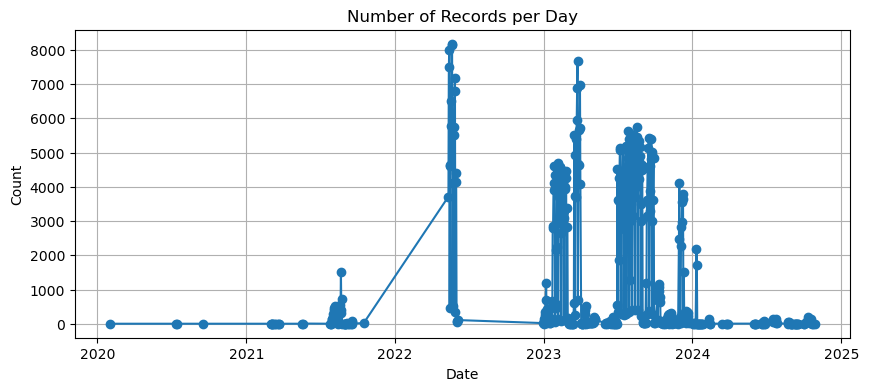

In [225]:
# 12. Time series trend - records per day based on Start Time
df['Start Date'] = df['Start Time'].dt.date
daily_counts = df.groupby('Start Date').size()

plt.figure(figsize=(10,4))
daily_counts.plot(kind='line', marker='o')
plt.title('Number of Records per Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Data Cleansing

#### Deduplication
```Duplicate data can significantly affect your data analysis by introducing bias, inaccuracy, and misleading results. Here's a brief overview:```

1. Inflated Metrics: Duplicates can artificially increase counts, totals, or averages. 
    Example: Repeated sales entries can inflate revenue.

2. Distorted Distributions: Summary statistics like mean, median, standard deviation may be skewed.
    Example: May give a false impression of customer behavior or trends.

3. Biased Insights: If duplicates favor a specific category, group-based analysis (e.g., by region or method) becomes biased.

```In this section we will focus on:```
1. Identifying duplicate data
2. Deduplication process


In [226]:
total_duplicates = df.duplicated().sum()
print(total_duplicates) # this variables shows total duplicate records

239


In [227]:
# Deduplication - removing duplicate rows
df_dedup = df.drop_duplicates()
df_dedup.shape

(658447, 13)

In [228]:
# validate dedup dataset
diff = df.shape[0] - df_dedup.shape[0]
print(diff)

239


In [229]:
df_dedup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658447 entries, 0 to 658685
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                658447 non-null  int64         
 1   Source            658447 non-null  object        
 2   Start Time        658447 non-null  datetime64[ns]
 3   End Time          658447 non-null  datetime64[ns]
 4   Amount            658251 non-null  float64       
 5   Kiosk ID          231646 non-null  float64       
 6   App Zone ID       426801 non-null  float64       
 7   Payment Method    658402 non-null  object        
 8   Location Group    658180 non-null  object        
 9   Last Updated      658447 non-null  datetime64[ns]
 10  payment_type      658402 non-null  object        
 11  Duration_minutes  658447 non-null  float64       
 12  Start Date        658447 non-null  object        
dtypes: datetime64[ns](3), float64(4), int64(1), object(5)
memory usa

#### Missing Value Handling
```Missing values can negatively impact your analysis by reducing accuracy, completeness, and reliability of the results. Here's a brief explanation:```

1. Incomplete Insights: Missing values can lead to gaps in understanding trends or behavior.
    For example, missing Amount values may affect revenue calculations.

2. Biased Analysis: If missing data is not random (e.g., mostly from one group), it can bias your results.
    This may lead to incorrect conclusions about certain categories or time periods.

```In this step we will focus on:```

1. Identifying missing records for the required columns e.g. Amount, Payment Method
2. treating missing values using measure of central e.g. mean, mode, median

In [230]:
df_dedup.columns

Index(['ID', 'Source', 'Start Time', 'End Time', 'Amount', 'Kiosk ID',
       'App Zone ID', 'Payment Method', 'Location Group', 'Last Updated',
       'payment_type', 'Duration_minutes', 'Start Date'],
      dtype='object')

In [231]:
# Missing value stats
df_dedup.isnull().sum()

ID                       0
Source                   0
Start Time               0
End Time                 0
Amount                 196
Kiosk ID            426801
App Zone ID         231646
Payment Method          45
Location Group         267
Last Updated             0
payment_type            45
Duration_minutes         0
Start Date               0
dtype: int64

In [232]:
amount_median = df_dedup['Amount'].median()
mode_payment_method = df_dedup['Payment Method'].mode()[0]
mode_payment_type = df_dedup['payment_type'].mode()[0]

print(amount_median)
print(mode_payment_method)
print(mode_payment_type)

3.3
App - Wallet
MOBILE APP


In [233]:
df_fixed = df_dedup.fillna({'Amount': amount_median, 'Payment Method': mode_payment_method, 'payment_type': mode_payment_type})

In [234]:
# check distinct parking location
df_fixed['Location Group'].unique()

array(['Level 2', 'Level 1', 'Level 4', 'Level 3', 'Underground 1',
       'Ground Level', nan, 'Unknown Location'], dtype=object)

In [235]:
# As we can see there are two invalid type of parking location, "Unknown Location" and nan. both are invalid values.
# We must consider both as missing values.
df_fixed['Location Group'] = df_fixed['Location Group'].replace('Unknown Location', pd.NA)
df_fixed['Location Group'] = df_fixed['Location Group'].fillna(df_dedup['Location Group'].mode()[0])


In [236]:
df_fixed.isnull().sum()

ID                       0
Source                   0
Start Time               0
End Time                 0
Amount                   0
Kiosk ID            426801
App Zone ID         231646
Payment Method           0
Location Group           0
Last Updated             0
payment_type             0
Duration_minutes         0
Start Date               0
dtype: int64

In [237]:
# check distinct parking location after fixing
df_fixed['Location Group'].unique()

array(['Level 2', 'Level 1', 'Level 4', 'Level 3', 'Underground 1',
       'Ground Level'], dtype=object)

#### Rename or Drop Irrelevant Columns
```Clean column names and remove unused or redundant fields```

In [238]:
# ID, App Zone Id and Kiosk Id are not useful for our analysis, so we can drop these columns
df_fixed = df_fixed.drop(["ID", "App Zone ID", "Kiosk ID", "Last Updated", "Start Date"], axis=1)

In [239]:
df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658447 entries, 0 to 658685
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Source            658447 non-null  object        
 1   Start Time        658447 non-null  datetime64[ns]
 2   End Time          658447 non-null  datetime64[ns]
 3   Amount            658447 non-null  float64       
 4   Payment Method    658447 non-null  object        
 5   Location Group    658447 non-null  object        
 6   payment_type      658447 non-null  object        
 7   Duration_minutes  658447 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 45.2+ MB


In [240]:
df_fixed.isnull().sum()

Source              0
Start Time          0
End Time            0
Amount              0
Payment Method      0
Location Group      0
payment_type        0
Duration_minutes    0
dtype: int64

In [241]:
# df_fixed has all the missing value fixed

#### Fix Data Types
```Fixing column data types helps in performing required arithmetic or string operations. It ensure columns are in the correct format (e.g., dates, integers, floats).```

In [242]:
df_fixed.dtypes

Source                      object
Start Time          datetime64[ns]
End Time            datetime64[ns]
Amount                     float64
Payment Method              object
Location Group              object
payment_type                object
Duration_minutes           float64
dtype: object

In [243]:
df_fixed["Source"] = df_fixed["Source"].astype("string")
df_fixed["Payment Method"] = df_fixed["Payment Method"].astype("string")
df_fixed["Location Group"] = df_fixed["Location Group"].astype("string")

In [244]:
df_fixed.head()

,Source,Start Time,End Time,Amount,Payment Method,Location Group,payment_type,Duration_minutes
0,Parking Meters,2023-03-16 20:19:00,2023-03-16 23:58:00,3.3,CARD,Level 2,CREDIT/DEBIT,219.0
1,Parking Meters,2023-03-16 20:19:00,2023-03-16 22:34:00,3.3,CARD,Level 2,CREDIT/DEBIT,135.0
2,Parking Meters,2023-03-16 20:20:00,2023-03-16 23:58:00,3.3,CARD,Level 1,CREDIT/DEBIT,218.0
3,Parking Meters,2023-03-16 20:19:00,2023-03-16 22:34:00,3.3,CARD,Level 2,CREDIT/DEBIT,135.0
4,Passport - app,2023-09-09 18:41:00,2023-09-09 20:11:00,3.3,App - Wallet,Level 1,MOBILE APP,90.0


In [245]:
df_fixed.dtypes

Source              string[python]
Start Time          datetime64[ns]
End Time            datetime64[ns]
Amount                     float64
Payment Method      string[python]
Location Group      string[python]
payment_type                object
Duration_minutes           float64
dtype: object

#### Standardize Formatting and Column Names
```Standardize columns name, here we are replacing spaces from the column name with _ and changing name to lowercase```

In [246]:
df_fixed = df_fixed.rename(columns={
    'Source': 'source',
    'Start Time': 'start_time',
    'End Time': 'end_time',
    'Location Group': 'location_group',
    'Amount': 'amount',
    'Payment Method': 'payment_method',
    'Location Group': 'location_group',
    'Duration_minutes': 'duration_minutes'
})

In [247]:
df_fixed.head() # This is our final clean data with no duplicates and missing values

,source,start_time,end_time,amount,payment_method,location_group,payment_type,duration_minutes
0,Parking Meters,2023-03-16 20:19:00,2023-03-16 23:58:00,3.3,CARD,Level 2,CREDIT/DEBIT,219.0
1,Parking Meters,2023-03-16 20:19:00,2023-03-16 22:34:00,3.3,CARD,Level 2,CREDIT/DEBIT,135.0
2,Parking Meters,2023-03-16 20:20:00,2023-03-16 23:58:00,3.3,CARD,Level 1,CREDIT/DEBIT,218.0
3,Parking Meters,2023-03-16 20:19:00,2023-03-16 22:34:00,3.3,CARD,Level 2,CREDIT/DEBIT,135.0
4,Passport - app,2023-09-09 18:41:00,2023-09-09 20:11:00,3.3,App - Wallet,Level 1,MOBILE APP,90.0


In [248]:
df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658447 entries, 0 to 658685
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   source            658447 non-null  string        
 1   start_time        658447 non-null  datetime64[ns]
 2   end_time          658447 non-null  datetime64[ns]
 3   amount            658447 non-null  float64       
 4   payment_method    658447 non-null  string        
 5   location_group    658447 non-null  string        
 6   payment_type      658447 non-null  object        
 7   duration_minutes  658447 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(1), string(3)
memory usage: 45.2+ MB


#### Validate Data Ranges and Logic
```Check if values fall within expected ranges or if dates/times are logically consistent.```

In [249]:
# Check for negative or zero durations
invalid_durations = df_fixed[df_fixed['duration_minutes'] < 0]
print(f"Records with invalid durations:\n{invalid_durations}")


Records with invalid durations:
Empty DataFrame
Columns: [source, start_time, end_time, amount, payment_method, location_group, payment_type, duration_minutes]
Index: []


In [250]:
# check for invalid amounts
invalid_amounts = df_fixed[df_fixed['amount'] < 0]
print(f"Records with negative Amount:\n{invalid_amounts}")

Records with negative Amount:
Empty DataFrame
Columns: [source, start_time, end_time, amount, payment_method, location_group, payment_type, duration_minutes]
Index: []


In [251]:
# Check for invalid start time
invalid_times = df_fixed[df_fixed['start_time'] > df_fixed['end_time']]
print(f"Records where Start Time is after End Time:\n{invalid_times}")

Records where Start Time is after End Time:
Empty DataFrame
Columns: [source, start_time, end_time, amount, payment_method, location_group, payment_type, duration_minutes]
Index: []


### Write Cleansed Data to SQL Server for further processing

In [252]:
df_fixed.head()

,source,start_time,end_time,amount,payment_method,location_group,payment_type,duration_minutes
0,Parking Meters,2023-03-16 20:19:00,2023-03-16 23:58:00,3.3,CARD,Level 2,CREDIT/DEBIT,219.0
1,Parking Meters,2023-03-16 20:19:00,2023-03-16 22:34:00,3.3,CARD,Level 2,CREDIT/DEBIT,135.0
2,Parking Meters,2023-03-16 20:20:00,2023-03-16 23:58:00,3.3,CARD,Level 1,CREDIT/DEBIT,218.0
3,Parking Meters,2023-03-16 20:19:00,2023-03-16 22:34:00,3.3,CARD,Level 2,CREDIT/DEBIT,135.0
4,Passport - app,2023-09-09 18:41:00,2023-09-09 20:11:00,3.3,App - Wallet,Level 1,MOBILE APP,90.0


In [253]:
# Create connection string
server = 'localhost'          # e.g., 'localhost\SQLEXPRESS'
database = 'DB_AirportParking'      # e.g., 'ParkingDB'
username = 'YOUR_USERNAME'           # optional if using Windows Auth
password = 'YOUR_PASSWORD'           # optional if using Windows Auth

# Use Windows Authentication (trusted connection)
conn_str = f"mssql+pyodbc://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"

# OR use SQL Server Authentication:
# conn_str = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

# Create SQLAlchemy engine
engine = create_engine(conn_str)

# Write to SQL (replace 'your_table_name' with actual table name)
df_fixed.to_sql('airport_parking_transactions', con=engine, if_exists='replace', index=False)

41